In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
features = pd.read_csv("C:/Users/진현킴/downloads/AI-class-main (1)/AI-class-main/titanic.csv")
print (features)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [26]:
features.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
features.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df=features.drop('Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [29]:
df_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
df_data=df.dropna()
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [33]:
df_data = df_data.drop(['PassengerId', 'Name', 'Ticket'], axis =1 )

In [46]:
df_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [47]:
A=df_data['Pclass']
A.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df = ['Sex', 'Embarked']
for dfarray in df :
    df_data[dfarray] = le.fit_transform(df_data[dfarray])

In [51]:
X = df_data.iloc[:,0:6].values
y = df_data[['Survived']]

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

C:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
X

array([[ 0.,  3.,  1., 22.,  1.,  0.],
       [ 1.,  1.,  0., 38.,  1.,  0.],
       [ 1.,  3.,  0., 26.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., 19.,  0.,  0.],
       [ 1.,  1.,  1., 26.,  0.,  0.],
       [ 0.,  3.,  1., 32.,  0.,  0.]])

In [53]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='ReLU'))
model.add(Dense(8,activation='ReLU'))
model.add(Dense(7,activation='ReLU'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                70        
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 7)                 63        
                                                                 
 dense_7 (Dense)             (None, 2)                 16        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


C:\anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
18/18 [==============================] - 2s 36ms/step - loss: 0.6983 - accuracy: 0.5325 - val_loss: 0.6770 - val_accuracy: 0.5734
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6427 - accuracy: 0.6098 - val_loss: 0.6042 - val_accuracy: 0.6224
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.3234 - accuracy: 0.8699 - val_loss: 0.0678 - val_accuracy: 0.9720
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9895 - val_loss: 0.1318 - val_accuracy: 0.9441
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9754 - val_loss: 0.0285 - val_accuracy: 0.9860
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0416 - accuracy: 0.9824 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 4.3356e-04 - val_accuracy: 1.0000
Epoch 8/

18/18 [==============================] - 0s 8ms/step - loss: 1.7576e-05 - accuracy: 1.0000 - val_loss: 2.0512e-05 - val_accuracy: 1.0000
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 1.6923e-05 - accuracy: 1.0000 - val_loss: 1.9908e-05 - val_accuracy: 1.0000
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 1.6396e-05 - accuracy: 1.0000 - val_loss: 1.9132e-05 - val_accuracy: 1.0000
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 1.5826e-05 - accuracy: 1.0000 - val_loss: 1.8631e-05 - val_accuracy: 1.0000
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 1.5333e-05 - accuracy: 1.0000 - val_loss: 1.8124e-05 - val_accuracy: 1.0000
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 1.4882e-05 - accuracy: 1.0000 - val_loss: 1.7585e-05 - val_accuracy: 1.0000
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 1.4389e-05 - accuracy: 1.0000 - val_los

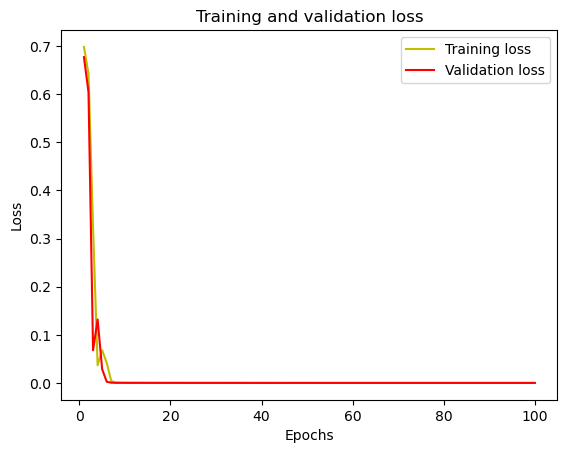

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

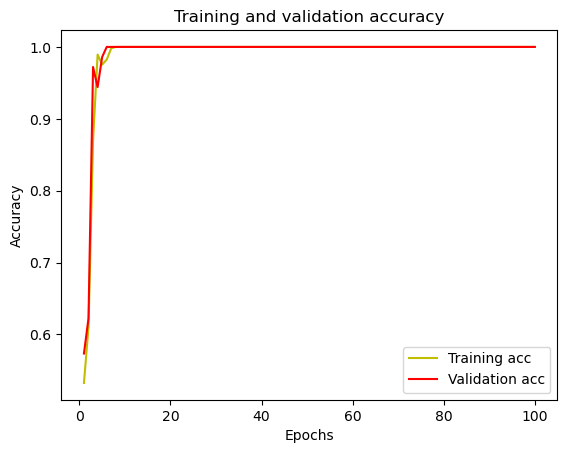

In [57]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        61

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

[[82  0]
 [ 0 61]]
